In [1]:
import pandas as pd
# reading dataset
data = pd.read_csv("grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              439 non-null    object 
 1   PM1(mcg/m³)      439 non-null    float64
 2   PM10(mcg/m³)     439 non-null    float64
 3   PM2.5(mcg/m³)    439 non-null    float64
 4   AQI US           439 non-null    float64
 5   NO(mcg/m³)       439 non-null    float64
 6   NO2(mcg/m³)      439 non-null    float64
 7   CH2O(mcg/m³)     439 non-null    float64
 8   SO2(mcg/m³)      439 non-null    float64
 9   Temperature(°C)  439 non-null    float64
 10  Humidity(%)      439 non-null    float64
dtypes: float64(10), object(1)
memory usage: 37.9+ KB


In [3]:
# Prepring dataset

In [4]:
data['Day'] = pd.to_datetime(data['Day'])

In [5]:
# Preparing for pm1 training the model and testing it

In [6]:
pm1 = data.drop('PM10(mcg/m³)', axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis = 1)
pm1 = pm1.drop('Day', axis=1)

In [7]:
pm1.tail()

,PM1(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,6.20,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,5.39,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,5.11,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,5.58,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,5.63,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [8]:
X = pm1.drop('PM1(mcg/m³)', axis=1)
Y = pm1['PM1(mcg/m³)']

In [9]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
import lightgbm as lgb

# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [11]:
# Making predictions
reg_pred = model_reg.predict(X_test)

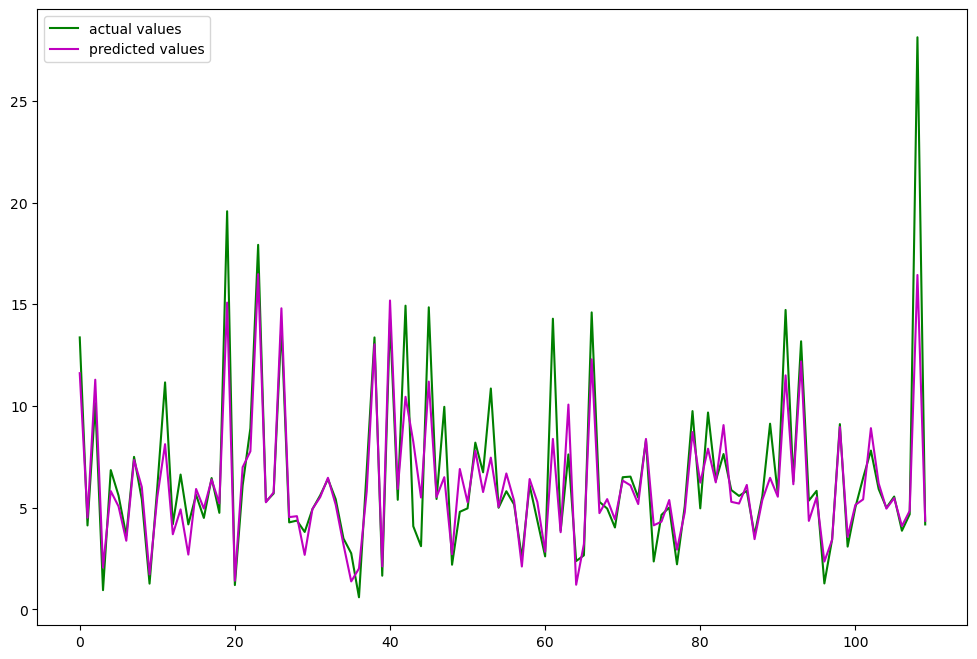

In [12]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [13]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.8138405694367675


In [14]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))



1.0275259575950282


In [15]:
# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.3211580726936316


In [16]:
# on training dataset

In [17]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [18]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))



R score is : 0.8983586685545335
0.6098683774393775
1.4967388138421425


In [19]:
import pickle
pickle.dump(model_reg, open('Lightgbm', 'wb'))

#### 

In [20]:
# Catboost regressor
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.034348
0:	learn: 3.7723204	total: 47.1ms	remaining: 47s
1:	learn: 3.7192570	total: 47.9ms	remaining: 23.9s
2:	learn: 3.6559844	total: 48.6ms	remaining: 16.2s
3:	learn: 3.5965826	total: 49.6ms	remaining: 12.3s
4:	learn: 3.5378912	total: 50.4ms	remaining: 10s
5:	learn: 3.4826744	total: 51.1ms	remaining: 8.46s
6:	learn: 3.4269893	total: 51.7ms	remaining: 7.34s
7:	learn: 3.3754912	total: 52.4ms	remaining: 6.5s
8:	learn: 3.3196043	total: 53.2ms	remaining: 5.86s
9:	learn: 3.2786057	total: 53.9ms	remaining: 5.33s
10:	learn: 3.2280522	total: 54.5ms	remaining: 4.9s
11:	learn: 3.1808748	total: 55.1ms	remaining: 4.54s
12:	learn: 3.1374615	total: 55.7ms	remaining: 4.23s
13:	learn: 3.0957114	total: 56.7ms	remaining: 3.99s
14:	learn: 3.0539241	total: 57.6ms	remaining: 3.78s
15:	learn: 3.0108297	total: 58.4ms	remaining: 3.59s
16:	learn: 2.9644161	total: 59.3ms	remaining: 3.43s
17:	learn: 2.9248161	total: 59.9ms	remaining: 3.27s
18:	learn: 2.8858800	total: 61.2ms	remaining: 3.16

181:	learn: 1.1995368	total: 187ms	remaining: 842ms
182:	learn: 1.1924964	total: 188ms	remaining: 840ms
183:	learn: 1.1878063	total: 189ms	remaining: 837ms
184:	learn: 1.1862506	total: 190ms	remaining: 835ms
185:	learn: 1.1841086	total: 190ms	remaining: 831ms
186:	learn: 1.1814372	total: 191ms	remaining: 829ms
187:	learn: 1.1787445	total: 191ms	remaining: 826ms
188:	learn: 1.1770559	total: 192ms	remaining: 823ms
189:	learn: 1.1751726	total: 192ms	remaining: 821ms
190:	learn: 1.1710879	total: 193ms	remaining: 818ms
191:	learn: 1.1690646	total: 194ms	remaining: 815ms
192:	learn: 1.1673006	total: 194ms	remaining: 812ms
193:	learn: 1.1656378	total: 195ms	remaining: 809ms
194:	learn: 1.1644285	total: 196ms	remaining: 807ms
195:	learn: 1.1609320	total: 196ms	remaining: 805ms
196:	learn: 1.1568986	total: 197ms	remaining: 803ms
197:	learn: 1.1536356	total: 198ms	remaining: 801ms
198:	learn: 1.1520198	total: 199ms	remaining: 799ms
199:	learn: 1.1471289	total: 199ms	remaining: 797ms
200:	learn: 

461:	learn: 0.7188416	total: 371ms	remaining: 432ms
462:	learn: 0.7162935	total: 372ms	remaining: 432ms
463:	learn: 0.7153679	total: 373ms	remaining: 431ms
464:	learn: 0.7149626	total: 373ms	remaining: 430ms
465:	learn: 0.7124463	total: 374ms	remaining: 429ms
466:	learn: 0.7122315	total: 375ms	remaining: 428ms
467:	learn: 0.7115113	total: 376ms	remaining: 427ms
468:	learn: 0.7103264	total: 376ms	remaining: 426ms
469:	learn: 0.7101781	total: 377ms	remaining: 425ms
470:	learn: 0.7090559	total: 378ms	remaining: 424ms
471:	learn: 0.7063180	total: 378ms	remaining: 423ms
472:	learn: 0.7045123	total: 379ms	remaining: 422ms
473:	learn: 0.7020857	total: 380ms	remaining: 421ms
474:	learn: 0.6998576	total: 380ms	remaining: 420ms
475:	learn: 0.6997128	total: 381ms	remaining: 419ms
476:	learn: 0.6985113	total: 382ms	remaining: 418ms
477:	learn: 0.6978310	total: 382ms	remaining: 417ms
478:	learn: 0.6968993	total: 383ms	remaining: 416ms
479:	learn: 0.6960248	total: 383ms	remaining: 415ms
480:	learn: 

748:	learn: 0.4659604	total: 556ms	remaining: 186ms
749:	learn: 0.4656514	total: 557ms	remaining: 186ms
750:	learn: 0.4644994	total: 558ms	remaining: 185ms
751:	learn: 0.4634431	total: 559ms	remaining: 184ms
752:	learn: 0.4629513	total: 559ms	remaining: 183ms
753:	learn: 0.4614936	total: 560ms	remaining: 183ms
754:	learn: 0.4607120	total: 560ms	remaining: 182ms
755:	learn: 0.4604850	total: 561ms	remaining: 181ms
756:	learn: 0.4600463	total: 562ms	remaining: 180ms
757:	learn: 0.4591214	total: 562ms	remaining: 180ms
758:	learn: 0.4581106	total: 563ms	remaining: 179ms
759:	learn: 0.4572049	total: 564ms	remaining: 178ms
760:	learn: 0.4566647	total: 565ms	remaining: 177ms
761:	learn: 0.4561265	total: 565ms	remaining: 177ms
762:	learn: 0.4558462	total: 566ms	remaining: 176ms
763:	learn: 0.4548095	total: 567ms	remaining: 175ms
764:	learn: 0.4545992	total: 568ms	remaining: 174ms
765:	learn: 0.4542619	total: 569ms	remaining: 174ms
766:	learn: 0.4537079	total: 569ms	remaining: 173ms
767:	learn: 

In [21]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

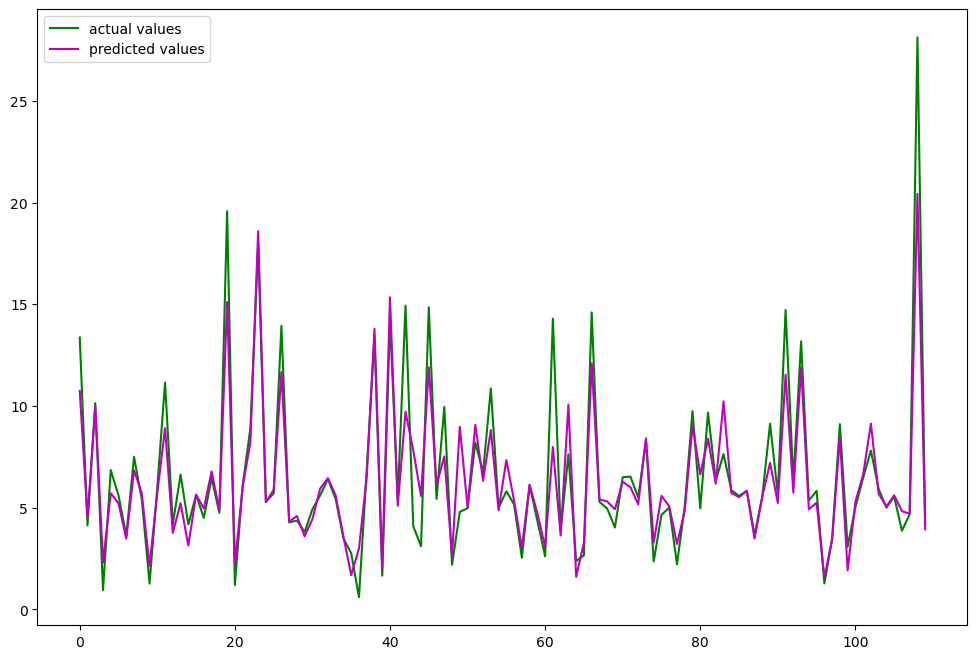

In [22]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [23]:
# calculating the r score 
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8501841770447388


In [24]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

0.9719629270545342
2.672773698972502


In [25]:
# making predictions
catboost_pred_train = CatBoost_rg.predict(X_train)

In [26]:
# calculating the r score 
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.99298000641081
0.24059235969708836
0.1033742546308637


In [27]:
pickle.dump(CatBoost_rg, open('CatBoost_reg', 'wb'))

In [28]:
# importing tensorflow module
import tensorflow as tf

# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
                                 # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])

2023-04-17 14:41:48.071536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 14:41:48.396717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 14:41:48.398047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 14:41:49.754429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [30]:
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 12.6393 - mae: 12.6393
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 6.7752 - mae: 6.7752
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 3.9808 - mae: 3.9808
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.3693 - mae: 3.3693
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.8537 - mae: 2.8537
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.4935 - mae: 2.4935
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2484 - mae: 2.2484
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0628 - mae: 2.0628
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9621 - mae: 1.9621
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.8780 - mae: 1.8780
Epoch 11/200
11/11 [==============================] - 0s 

11/11 [==============================] - 0s 2ms/step - loss: 1.3117 - mae: 1.3117
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3128 - mae: 1.3128
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3041 - mae: 1.3041
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3113 - mae: 1.3113
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3123 - mae: 1.3123
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3280 - mae: 1.3280
Epoch 93/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3335 - mae: 1.3335
Epoch 94/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3134 - mae: 1.3134
Epoch 95/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3971 - mae: 1.3971
Epoch 96/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3719 - mae: 1.3719
Epoch 97/200
11/11 [==============================] - 0s 2ms/st

11/11 [==============================] - 0s 2ms/step - loss: 1.2404 - mae: 1.2404
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2194 - mae: 1.2194
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2677 - mae: 1.2677
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2523 - mae: 1.2523
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2263 - mae: 1.2263
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2302 - mae: 1.2302
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2483 - mae: 1.2483
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2205 - mae: 1.2205
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2246 - mae: 1.2246
Epoch 181/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2447 - mae: 1.2447
Epoch 182/200
11/11 [==============================] -

In [31]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)
y_preds_train = model.predict(X_train)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 1ms/step
R score is : 0.8009305873976902


In [32]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

1.243824497130784
3.5514772724123267


In [33]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.7529681945445829
1.2041837613415938
3.6377139714762716


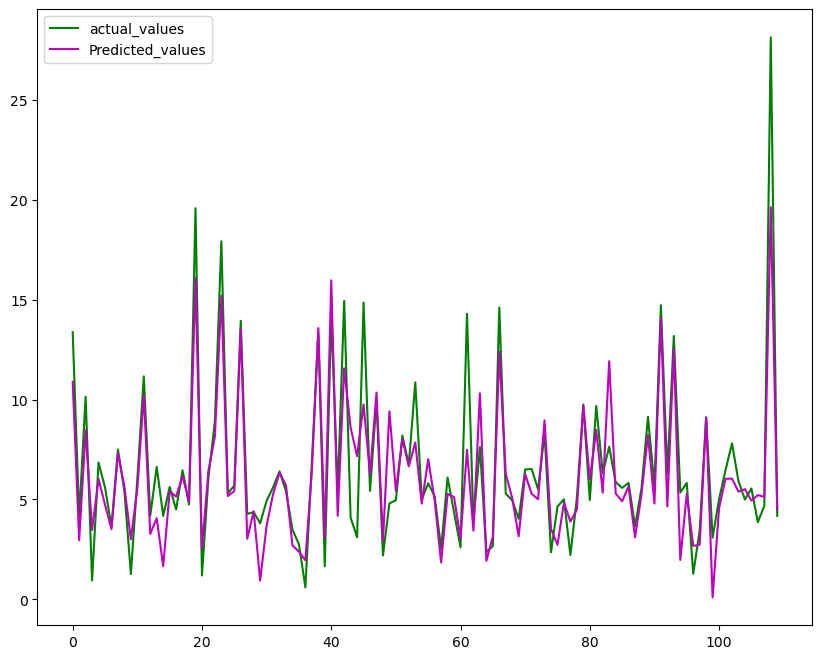

In [34]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [35]:
pickle.dump(model, open('Neural Networks', 'wb'))

In [36]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

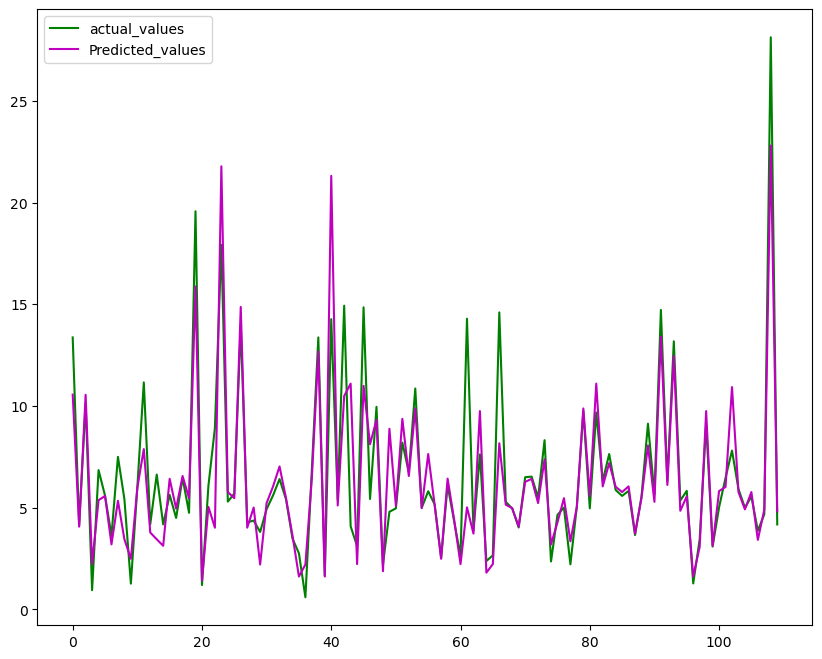

In [38]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [39]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.7676857088400653
1.1453636363636364
4.14457909090909


In [40]:
print('R score is :', r2_score(y_train, y_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_train))

R score is : 1.0
0.0
0.0


In [41]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)

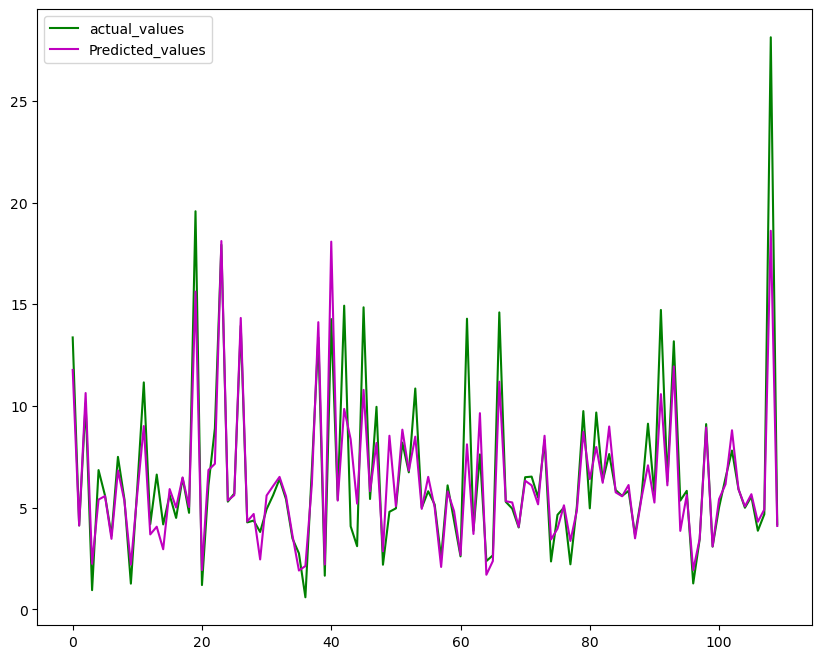

In [42]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_predR, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [43]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.8287640583731435
0.980540909090909
3.0549171113636393


In [44]:
# making predictions for Random forest using python
y_predT = regressor1.predict(X_train)

In [45]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.9614038483444222
0.413955015197569
0.5683549932522809


In [46]:
pickle.dump(regressor1, open('Random Forest', 'wb'))

In [47]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)

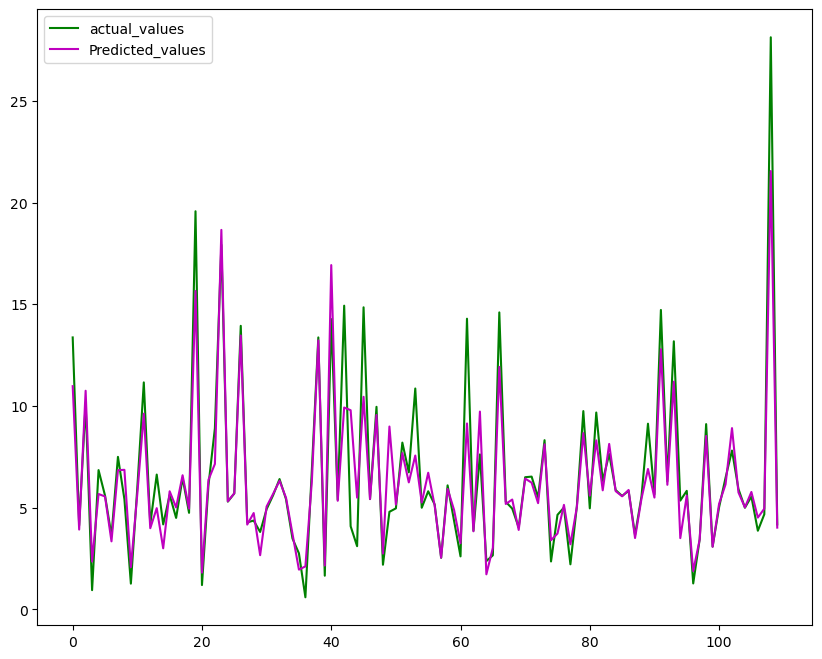

In [48]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_predE, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [49]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.860834691396432
0.9119109090909097
2.4827642989090957


In [50]:
# Making predictions
y_predET = regressor2.predict(X_train)

In [51]:
print('R score is :', r2_score(y_train, y_predET))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predET))
# printing the mean squared error
print(mean_squared_error(y_train, y_predET))

R score is : 1.0
8.073919783337841e-15
1.1863829612651632e-28


In [52]:
pickle.dump(regressor2, open('Extra Trees', 'wb'))

In [53]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)

In [54]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.8551071670109279
1.0279075827165083
2.584945605501593


In [55]:
# making predictions
model_pred_train = model.predict(X_train)

In [56]:
print('R score is :', r2_score(y_train, model_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, model_pred_train))

R score is : 0.9999901571161831
0.008166554024878977
0.0001449432631326465


In [57]:
pickle.dump(model, open('XGBoost_reg', 'wb'))

In [58]:
# pm2.5 regression models


In [59]:
pm2 = data.drop('PM10(mcg/m³)', axis=1)
pm2 = pm2.drop('PM1(mcg/m³)', axis = 1)
pm2 = pm2.drop('Day', axis=1)

In [60]:
X_pm = pm2.drop('PM2.5(mcg/m³)', axis=1)
Y_pm = pm2['PM2.5(mcg/m³)']

In [61]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

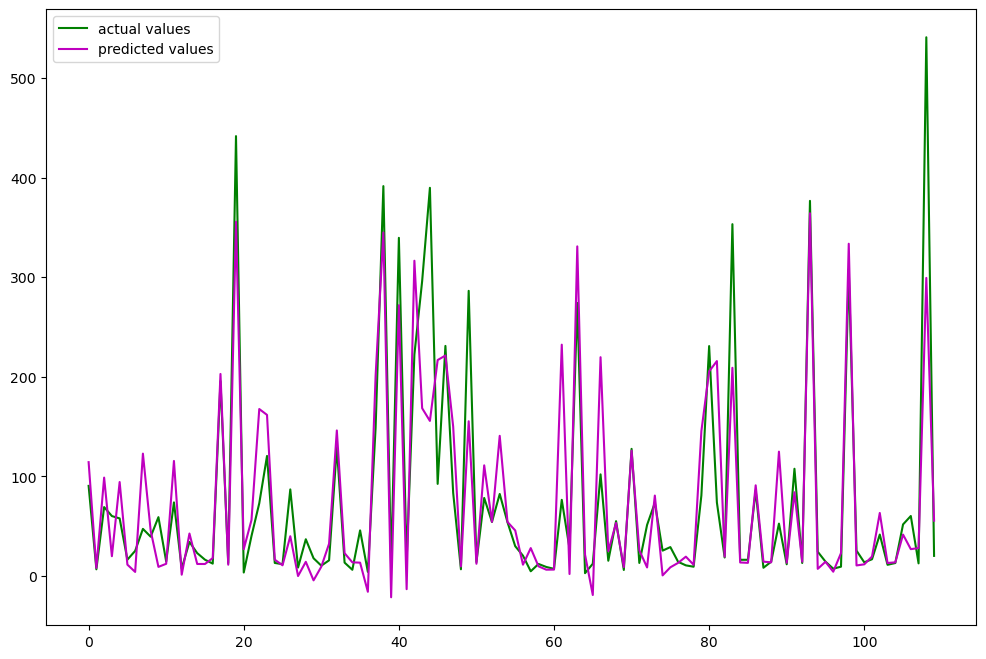

In [62]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [63]:
# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.7445767102807783


In [64]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

31.791548609801804
3042.092502982969


In [65]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [66]:
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))

R score is : 0.9064137110633096
17.771949082765257
1260.9248511303947


In [68]:


import pickle
pickle.dump(model_reg, open('PM2.5_model/LightGBM', 'wb'))

In [69]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 113.7231191	total: 997us	remaining: 996ms
1:	learn: 111.8926954	total: 1.7ms	remaining: 850ms
2:	learn: 109.7608171	total: 2.42ms	remaining: 804ms
3:	learn: 107.6242940	total: 3.15ms	remaining: 784ms
4:	learn: 105.7852525	total: 3.84ms	remaining: 765ms
5:	learn: 103.8981890	total: 4.53ms	remaining: 751ms
6:	learn: 101.9443884	total: 5.21ms	remaining: 739ms
7:	learn: 100.1816950	total: 5.92ms	remaining: 734ms
8:	learn: 98.4276263	total: 6.66ms	remaining: 733ms
9:	learn: 96.9598829	total: 7.56ms	remaining: 749ms
10:	learn: 95.2972959	total: 8.51ms	remaining: 765ms
11:	learn: 93.6105622	total: 9.11ms	remaining: 750ms
12:	learn: 92.0112300	total: 9.76ms	remaining: 741ms
13:	learn: 90.4355915	total: 10.4ms	remaining: 729ms
14:	learn: 89.1307447	total: 11ms	remaining: 724ms
15:	learn: 87.7162597	total: 11.6ms	remaining: 713ms
16:	learn: 86.5216816	total: 12.3ms	remaining: 711ms
17:	learn: 85.3526893	total: 12.9ms	remaining: 706ms
18:	learn: 84.1474664	

261:	learn: 31.3672872	total: 184ms	remaining: 518ms
262:	learn: 31.2710509	total: 185ms	remaining: 519ms
263:	learn: 31.2258329	total: 186ms	remaining: 518ms
264:	learn: 31.2162148	total: 187ms	remaining: 518ms
265:	learn: 31.1231429	total: 187ms	remaining: 517ms
266:	learn: 31.0629425	total: 188ms	remaining: 516ms
267:	learn: 31.0429820	total: 189ms	remaining: 516ms
268:	learn: 30.9913978	total: 189ms	remaining: 515ms
269:	learn: 30.9577881	total: 190ms	remaining: 514ms
270:	learn: 30.8688321	total: 191ms	remaining: 513ms
271:	learn: 30.8102033	total: 191ms	remaining: 512ms
272:	learn: 30.8003774	total: 192ms	remaining: 512ms
273:	learn: 30.7238123	total: 193ms	remaining: 511ms
274:	learn: 30.6721375	total: 194ms	remaining: 510ms
275:	learn: 30.6519235	total: 194ms	remaining: 509ms
276:	learn: 30.6042129	total: 195ms	remaining: 509ms
277:	learn: 30.5185546	total: 196ms	remaining: 508ms
278:	learn: 30.4573844	total: 196ms	remaining: 507ms
279:	learn: 30.4243982	total: 197ms	remaining:

540:	learn: 20.1199880	total: 369ms	remaining: 313ms
541:	learn: 20.0311532	total: 370ms	remaining: 312ms
542:	learn: 20.0145639	total: 370ms	remaining: 312ms
543:	learn: 19.9866679	total: 371ms	remaining: 311ms
544:	learn: 19.9548780	total: 372ms	remaining: 311ms
545:	learn: 19.9430284	total: 373ms	remaining: 310ms
546:	learn: 19.9002797	total: 374ms	remaining: 309ms
547:	learn: 19.8843897	total: 374ms	remaining: 309ms
548:	learn: 19.8728260	total: 375ms	remaining: 308ms
549:	learn: 19.8705265	total: 376ms	remaining: 307ms
550:	learn: 19.8004299	total: 376ms	remaining: 306ms
551:	learn: 19.6905014	total: 377ms	remaining: 306ms
552:	learn: 19.6651925	total: 377ms	remaining: 305ms
553:	learn: 19.6373926	total: 378ms	remaining: 304ms
554:	learn: 19.6254597	total: 379ms	remaining: 304ms
555:	learn: 19.5925727	total: 379ms	remaining: 303ms
556:	learn: 19.5887353	total: 380ms	remaining: 302ms
557:	learn: 19.5842093	total: 381ms	remaining: 302ms
558:	learn: 19.5722656	total: 381ms	remaining:

823:	learn: 12.7725516	total: 553ms	remaining: 118ms
824:	learn: 12.7348662	total: 554ms	remaining: 118ms
825:	learn: 12.7080057	total: 555ms	remaining: 117ms
826:	learn: 12.6590799	total: 556ms	remaining: 116ms
827:	learn: 12.6536514	total: 557ms	remaining: 116ms
828:	learn: 12.6525735	total: 557ms	remaining: 115ms
829:	learn: 12.6406022	total: 558ms	remaining: 114ms
830:	learn: 12.6394164	total: 559ms	remaining: 114ms
831:	learn: 12.6189431	total: 560ms	remaining: 113ms
832:	learn: 12.6067126	total: 560ms	remaining: 112ms
833:	learn: 12.5646149	total: 561ms	remaining: 112ms
834:	learn: 12.5603253	total: 562ms	remaining: 111ms
835:	learn: 12.5338763	total: 562ms	remaining: 110ms
836:	learn: 12.5224146	total: 563ms	remaining: 110ms
837:	learn: 12.5142539	total: 564ms	remaining: 109ms
838:	learn: 12.5024026	total: 565ms	remaining: 108ms
839:	learn: 12.4871696	total: 565ms	remaining: 108ms
840:	learn: 12.4724477	total: 566ms	remaining: 107ms
841:	learn: 12.4470095	total: 567ms	remaining:

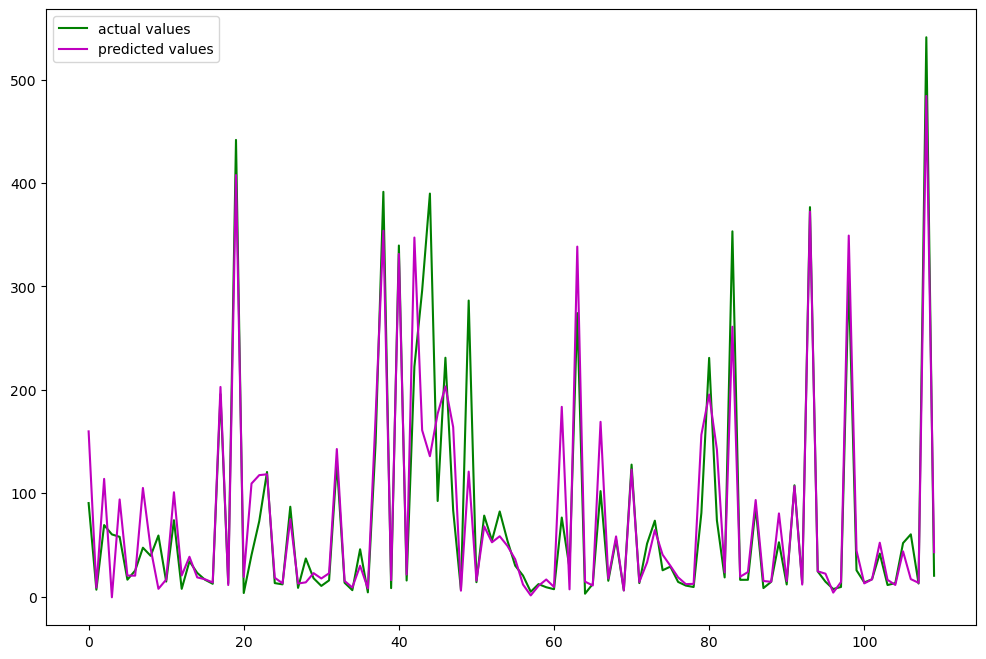

In [70]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [71]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8303657382484211


In [72]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

23.622851237385852
2020.3448028987402


In [73]:
catboost_pred_train = CatBoost_rg.predict(X_train)

In [74]:
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.992891099001625
6.3369127227750015
95.78101701565102


In [75]:
import pickle
pickle.dump(CatBoost_rg, open('PM2.5_model/CatBoost', 'wb'))

In [66]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 1ms/step - loss: 69.4247 - mae: 69.4247
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 64.8705 - mae: 64.8705
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 61.4060 - mae: 61.4060
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 57.4794 - mae: 57.4794
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 53.6941 - mae: 53.6941
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 50.5784 - mae: 50.5784
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 48.3716 - mae: 48.3716
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 47.2708 - mae: 47.2708
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 46.3498 - mae: 46.3498
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 45.6953 - mae: 45.6953
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 2ms/step - loss: 30.7579 - mae: 30.7579
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 30.8594 - mae: 30.8594
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 30.7407 - mae: 30.7407
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 30.5991 - mae: 30.5991
Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 30.7375 - mae: 30.7375
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 30.5787 - mae: 30.5787
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 30.6419 - mae: 30.6419
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 30.6265 - mae: 30.6265
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 30.6321 - mae: 30.6321
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 30.5760 - mae: 30.5760
Epoch 178/200
11/11 [=============

In [67]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

y_preds_train = model.predict(X_train)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 1ms/step
R score is : 0.7409153320656929


In [68]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

26.288950652856723
3085.699533614123


In [69]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.7082459261082104
30.158540244700333
3930.9172996223388


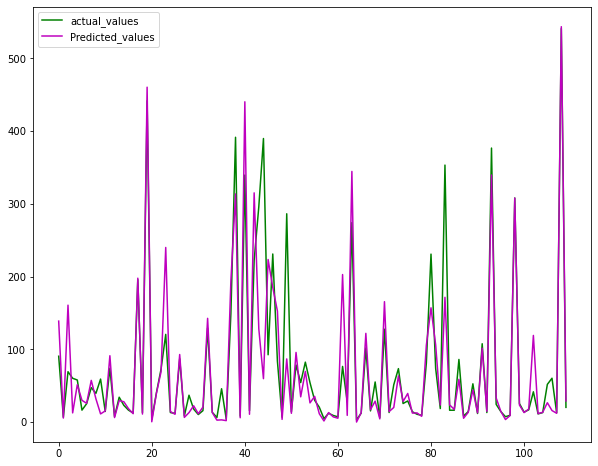

In [70]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [76]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.5348545057956453
29.527818181818176
5539.8848800000005


In [77]:
print('R score is :', r2_score(y_train, y_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_train))

R score is : 1.0
0.0
0.0


In [78]:
pickle.dump(regressor, open('PM2.5_model/Deicion Tree', 'wb'))

In [79]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)
y_predT = regressor1.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.827009947242345
21.855077272727282
2060.3122885277276


In [80]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.9581278151042744
10.991066261398178
564.1604032601831


In [81]:
pickle.dump(regressor1, open('PM2.5_model/Random Forest', 'wb'))

In [82]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)
y_pred_trains = regressor2.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.8639180221136432
20.178366363636368
1620.7369546224545


In [83]:
print('R score is :', r2_score(y_train, y_pred_trains))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_trains))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_trains))

R score is : 1.0
1.0636004066670376e-13
4.4411367970244884e-26


In [84]:
pickle.dump(regressor2, open('PM2.5_model/Extra Tree', 'wb'))

In [85]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)
model_pred_train = model.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.8501443791938179
21.975366427681664
1784.7811023241975


In [86]:
print('R score is :', r2_score(y_train, model_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, model_pred_train))

R score is : 0.9999918655345342
0.21571266646805526
0.10959885014143994


In [87]:
pickle.dump(model, open('PM2.5_model/XGBoost', 'wb'))

In [88]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis = 1)
pm10 = pm10.drop('Day', axis=1)

In [89]:
X_pm = pm10.drop('PM10(mcg/m³)', axis=1)
Y_pm = pm10['PM10(mcg/m³)']

In [90]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

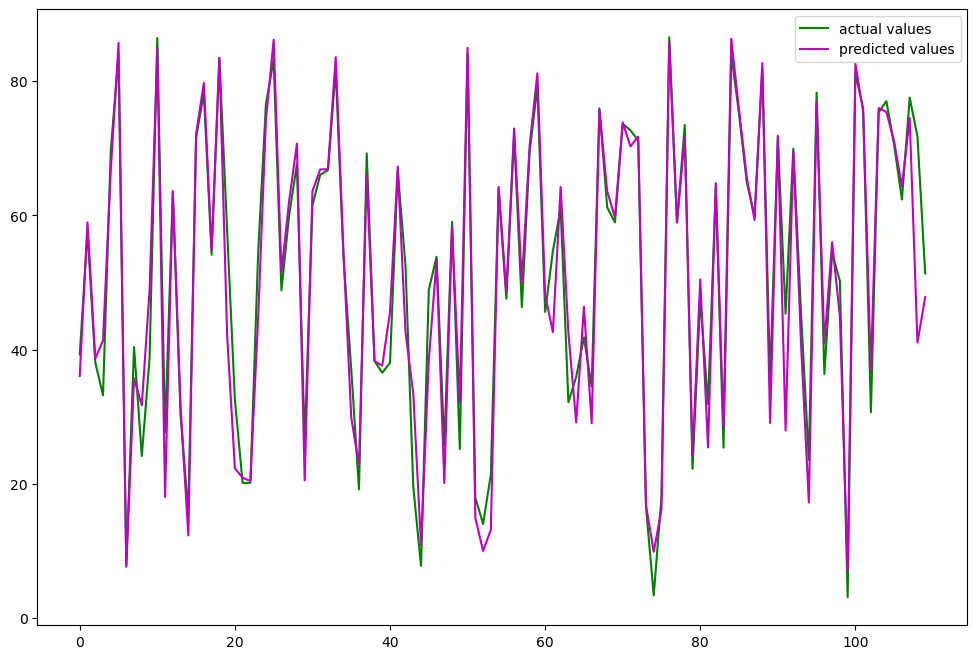

In [91]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [92]:
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.9335898096026211


In [93]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.6777532528294654
32.93030742458598


In [94]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [95]:
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))

R score is : 0.978130517654847
1.935405575852437
11.519967200783183


In [96]:
pickle.dump(model_reg, open('PM10/Lightgbm', 'wb'))

In [97]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)
catboost_pred_train = CatBoost_rg.predict(X_train)

Learning rate set to 0.034348
0:	learn: 22.3615496	total: 1.2ms	remaining: 1.2s
1:	learn: 21.7684974	total: 1.86ms	remaining: 929ms
2:	learn: 21.2099516	total: 2.51ms	remaining: 835ms
3:	learn: 20.7083605	total: 3.17ms	remaining: 789ms
4:	learn: 20.2089433	total: 3.76ms	remaining: 748ms
5:	learn: 19.6756231	total: 4.35ms	remaining: 721ms
6:	learn: 19.1501440	total: 4.97ms	remaining: 705ms
7:	learn: 18.7052511	total: 5.54ms	remaining: 687ms
8:	learn: 18.2578720	total: 6.27ms	remaining: 690ms
9:	learn: 17.8524962	total: 6.99ms	remaining: 692ms
10:	learn: 17.4020217	total: 7.63ms	remaining: 686ms
11:	learn: 16.9992769	total: 8.21ms	remaining: 676ms
12:	learn: 16.5938067	total: 8.8ms	remaining: 669ms
13:	learn: 16.2092018	total: 9.42ms	remaining: 663ms
14:	learn: 15.8534734	total: 10ms	remaining: 660ms
15:	learn: 15.4821121	total: 10.7ms	remaining: 658ms
16:	learn: 15.0994892	total: 11.3ms	remaining: 655ms
17:	learn: 14.7525131	total: 12.1ms	remaining: 658ms
18:	learn: 14.4069598	total: 12

257:	learn: 3.1701064	total: 184ms	remaining: 529ms
258:	learn: 3.1676385	total: 185ms	remaining: 528ms
259:	learn: 3.1578380	total: 185ms	remaining: 527ms
260:	learn: 3.1520188	total: 186ms	remaining: 527ms
261:	learn: 3.1393572	total: 187ms	remaining: 527ms
262:	learn: 3.1375476	total: 188ms	remaining: 526ms
263:	learn: 3.1269971	total: 188ms	remaining: 525ms
264:	learn: 3.1150503	total: 189ms	remaining: 524ms
265:	learn: 3.1140510	total: 190ms	remaining: 524ms
266:	learn: 3.1115437	total: 191ms	remaining: 523ms
267:	learn: 3.1086311	total: 191ms	remaining: 522ms
268:	learn: 3.1070798	total: 192ms	remaining: 521ms
269:	learn: 3.1045098	total: 193ms	remaining: 522ms
270:	learn: 3.0966461	total: 194ms	remaining: 521ms
271:	learn: 3.0860876	total: 194ms	remaining: 520ms
272:	learn: 3.0825781	total: 195ms	remaining: 519ms
273:	learn: 3.0791204	total: 195ms	remaining: 518ms
274:	learn: 3.0742583	total: 196ms	remaining: 516ms
275:	learn: 3.0605305	total: 197ms	remaining: 516ms
276:	learn: 

528:	learn: 1.8933102	total: 368ms	remaining: 327ms
529:	learn: 1.8922312	total: 369ms	remaining: 327ms
530:	learn: 1.8908140	total: 369ms	remaining: 326ms
531:	learn: 1.8886073	total: 370ms	remaining: 326ms
532:	learn: 1.8863337	total: 371ms	remaining: 325ms
533:	learn: 1.8856235	total: 372ms	remaining: 324ms
534:	learn: 1.8829067	total: 372ms	remaining: 324ms
535:	learn: 1.8799060	total: 373ms	remaining: 323ms
536:	learn: 1.8791646	total: 374ms	remaining: 322ms
537:	learn: 1.8781969	total: 375ms	remaining: 322ms
538:	learn: 1.8681082	total: 375ms	remaining: 321ms
539:	learn: 1.8628170	total: 376ms	remaining: 320ms
540:	learn: 1.8622085	total: 377ms	remaining: 320ms
541:	learn: 1.8551094	total: 378ms	remaining: 319ms
542:	learn: 1.8529385	total: 378ms	remaining: 318ms
543:	learn: 1.8505140	total: 379ms	remaining: 318ms
544:	learn: 1.8446973	total: 380ms	remaining: 317ms
545:	learn: 1.8437862	total: 380ms	remaining: 316ms
546:	learn: 1.8366521	total: 381ms	remaining: 316ms
547:	learn: 

791:	learn: 1.2615905	total: 552ms	remaining: 145ms
792:	learn: 1.2610903	total: 553ms	remaining: 144ms
793:	learn: 1.2609181	total: 554ms	remaining: 144ms
794:	learn: 1.2606768	total: 554ms	remaining: 143ms
795:	learn: 1.2594454	total: 555ms	remaining: 142ms
796:	learn: 1.2577811	total: 556ms	remaining: 142ms
797:	learn: 1.2567238	total: 556ms	remaining: 141ms
798:	learn: 1.2561061	total: 557ms	remaining: 140ms
799:	learn: 1.2559549	total: 558ms	remaining: 139ms
800:	learn: 1.2553978	total: 558ms	remaining: 139ms
801:	learn: 1.2520104	total: 559ms	remaining: 138ms
802:	learn: 1.2518549	total: 560ms	remaining: 137ms
803:	learn: 1.2490686	total: 560ms	remaining: 137ms
804:	learn: 1.2477180	total: 561ms	remaining: 136ms
805:	learn: 1.2459159	total: 562ms	remaining: 135ms
806:	learn: 1.2457766	total: 563ms	remaining: 135ms
807:	learn: 1.2446885	total: 563ms	remaining: 134ms
808:	learn: 1.2408694	total: 564ms	remaining: 133ms
809:	learn: 1.2407137	total: 565ms	remaining: 132ms
810:	learn: 

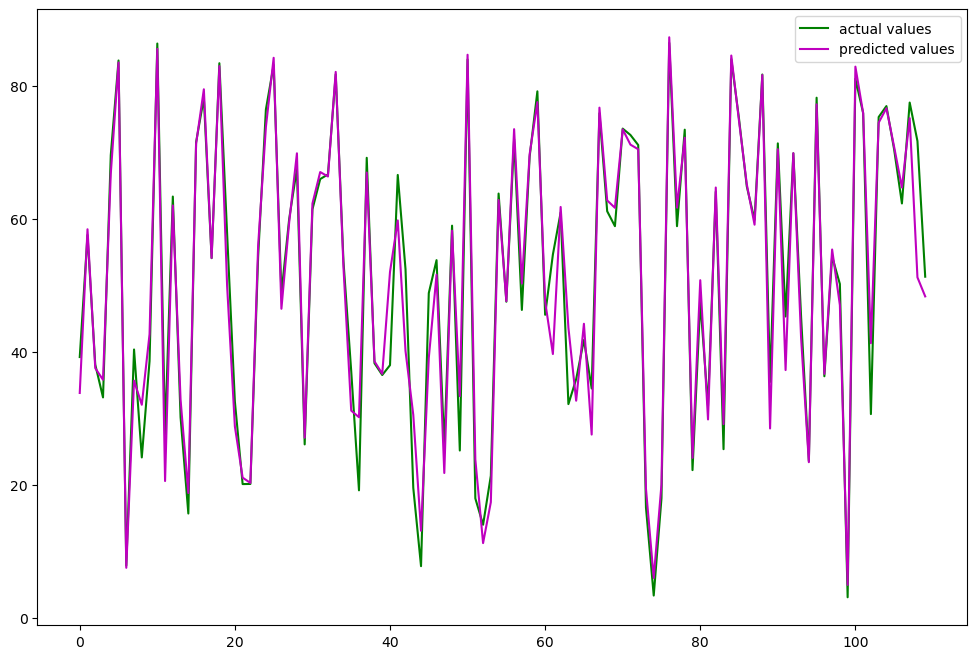

In [98]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [99]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.9543844431980028


In [100]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

3.0379878052416505
22.619033311681605


In [101]:
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.9982223430049227
0.7211223590997491
0.9363984914838227


In [102]:
pickle.dump(CatBoost_rg, open('PM10/CatBoost_reg', 'wb'))

In [96]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 1ms/step - loss: 63.8601 - mae: 63.8601
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 53.4609 - mae: 53.4609
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 44.3599 - mae: 44.3599
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 37.7256 - mae: 37.7256
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 35.0167 - mae: 35.0167
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 33.4910 - mae: 33.4910
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 32.4837 - mae: 32.4837
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 31.6679 - mae: 31.6679
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 30.8396 - mae: 30.8396
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 29.8860 - mae: 29.8860
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 2ms/step - loss: 4.4485 - mae: 4.4485
Epoch 172/200
11/11 [==============================] - 0s 3ms/step - loss: 4.5364 - mae: 4.5364
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3819 - mae: 4.3819
Epoch 174/200
11/11 [==============================] - 0s 3ms/step - loss: 4.3622 - mae: 4.3622
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4314 - mae: 4.4314
Epoch 176/200
11/11 [==============================] - 0s 3ms/step - loss: 4.3763 - mae: 4.3763
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3558 - mae: 4.3558
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3439 - mae: 4.3439
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3685 - mae: 4.3685
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3112 - mae: 4.3112
Epoch 181/200
11/11 [==============================] -

In [97]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)
y_preds_train = model.predict(X_train)
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 1ms/step
R score is : 0.9193826080668547


In [98]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

4.223810915535146
39.97512255636581


In [99]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.9163541093945347
4.270804732135726
44.06130428911711


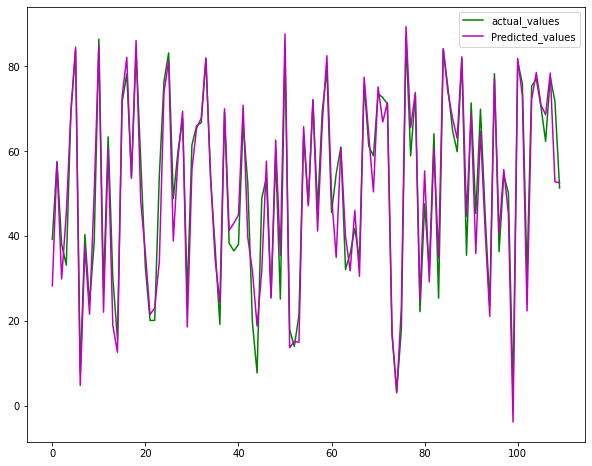

In [72]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [100]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_t = regressor.predict(X_train)

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.9221216234560401
4.0942727272727275
38.616948181818195


In [101]:
print('R score is :', r2_score(y_train, y_pred_t))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_t))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_t))

R score is : 1.0
0.0
0.0


In [103]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)
y_predT = regressor1.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.9442571331664216
3.3648645454545374
27.64078420154544


In [104]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.9913147110631938
1.3410252279635273
4.575062276382984


In [105]:
pickle.dump(regressor1, open('PM10/Random Forest', 'wb'))

In [106]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)
y_predT = regressor2.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.9544671137642601
2.8814981818181815
22.578040097454558


In [107]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 1.0
6.520214965715e-14
6.874328295989907e-27


In [108]:
pickle.dump(regressor2, open('PM10/Extra Trees', 'wb'))

In [109]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)
model_predT = model.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.9351420519730541
3.739361653934825
32.16060900706953


In [110]:
print('R score is :', r2_score(y_train, model_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_predT))
# printing the mean squared error
print(mean_squared_error(y_train, model_predT))

R score is : 0.9999933823792613
0.04014483841719252
0.003485897501103569


In [111]:
pickle.dump(model, open('PM10/Xgboost', 'wb'))

### Forecasting of PM1, PM2.5, PM10

In [58]:
# forecasting for pm1
data.head()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
0,2021-06-20,6.26,58.65,21.02,68.29,0.0,45.87,0.0,0.0,19.76,44.81
1,2021-06-21,5.61,66.03,15.63,56.14,0.0,21.66,0.0,0.0,23.50,37.54
2,2021-06-22,6.38,69.90,11.60,44.30,0.0,20.43,0.0,0.0,23.31,32.35
3,2021-06-23,6.43,69.69,12.40,46.40,0.0,20.18,0.0,0.0,23.28,33.41
4,2021-06-24,5.66,71.40,11.68,45.06,0.0,24.93,0.0,0.0,25.21,34.48


In [131]:
pm1 = data.drop('PM10(mcg/m³)' , axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis=1)
pm1 = pm1.drop('AQI US', axis=1)
pm1 = pm1.drop('NO2(mcg/m³)', axis=1)
pm1 = pm1.drop('CH2O(mcg/m³)', axis=1)
pm1 = pm1.drop('SO2(mcg/m³)', axis=1)
pm1 = pm1.drop('Temperature(°C)', axis=1)
pm1 = pm1.drop('Humidity(%)', axis=1)
pm1 = pm1.drop('NO(mcg/m³)', axis=1)

pm1.set_index('Day', inplace=True)

In [132]:
pm1.isnull().sum()

PM1(mcg/m³)    0
dtype: int64

In [66]:
# finding the rolling mean and std
mean = pm1.rolling(window=12).mean() 
std = pm1.rolling(window=12).std()

/tmp/ipykernel_315174/2020711727.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Day'], dtype='object')
  mean = pm1.rolling(window=12).mean()
/tmp/ipykernel_315174/2020711727.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Day'], dtype='object')
  std = pm1.rolling(window=12).std()


In [ ]:
# This graphs shows that the data is non-stationary. So, in order to apply the arima model, we have to convert 
# dataset into stationary dataset

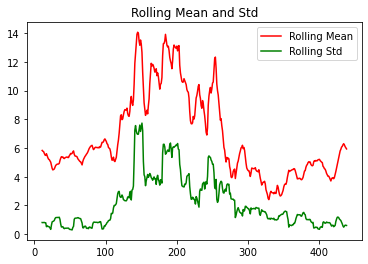

In [68]:
# importing the required modules
import matplotlib.pyplot as plt

#Plot rolling statistics
mean = plt.plot(mean, color='red', label='Rolling Mean')
std = plt.plot(std, color='green', label='Rolling Std')

# labeling the axis
plt.legend(loc='best')
plt.title('Rolling Mean and Std')
plt.show()

In [ ]:
# many possible ways to convert the non-stationary data into stationry, here we are using log scale transforamtion

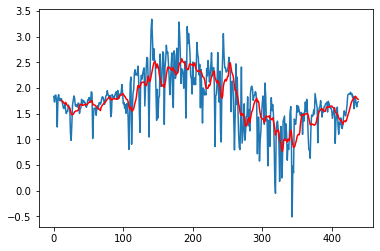

In [71]:
# importing the module
import numpy as np

#Applying the log transformation on Closing price
logScale = np.log(pm1['PM1(mcg/m³)'])

#TFinding the average and std
moving_Average = logScale.rolling(window=12).mean()
moving_STD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(moving_Average, color='red')
plt.show()

In [ ]:
# We currently have the time series’ log(x) values. Therefore, we can construct a function that 
# subtracts the rolling mean and the mean of the log scale, resulting in a constant mean, to make the 
# dataset stationary.

# Let us now transform the time series dataset into the new one.

In [72]:
# # transforming the time series
log_transformed = logScale - moving_Average

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

11    0.037237
12   -0.019132
13   -0.072921
14   -0.114461
15   -0.090984
Name: PM1(mcg/m³), dtype: float64

In [73]:
# As we now have the transformed time series. Let us now find the rolling mean and std and then will 
# again visualize the time series to see if the data is now stationary.

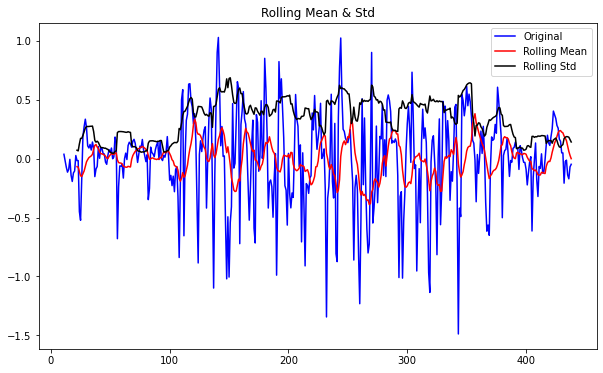

In [74]:
# fixing the size of image
plt.figure(figsize=[10, 6])

# finding the rolling mean and std
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
# plotting graph and meaa and std
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()

In [75]:
# Timeshift transformation is another method through which we can convert a stationary 
# time series to a non stationary one. Let us first apply the timeshift transformation
# on the time series dataset and then visualize it.

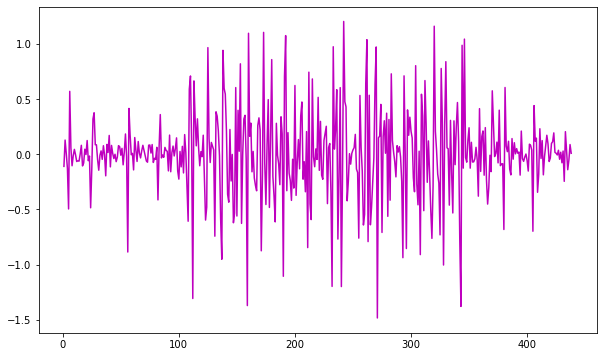

In [76]:
# fixing the size of image
plt.figure(figsize=[10, 6])

#  applynig timeshift transformation
Shifting = logScale - logScale.shift()

# plotting the timeshif 
plt.plot(Shifting , c='m')

# showing the timeshift
plt.show()

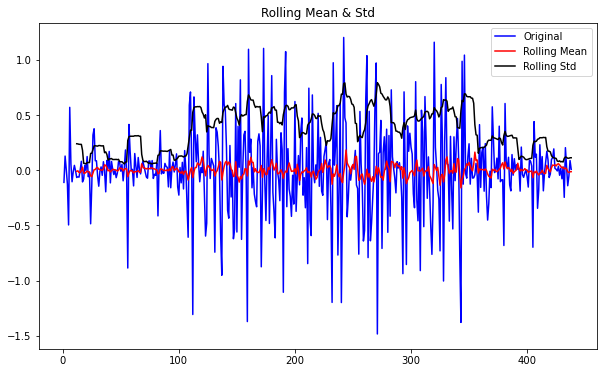

In [77]:
# fixing the size of image
plt.figure(figsize=[10, 6])

#rolling mean of timeshift transformed data
moving_Average = Shifting.rolling(window=12).mean()

# rolling std of timeshift transformed data
moving_STD = Shifting.rolling(window=12).std()
    
#plotting the original data
orig = plt.plot(Shifting, color='blue', label='Original')

# plotting the mean and std of transformed data
mean = plt.plot(moving_Average, color='red', label='Rolling Mean')
std = plt.plot(moving_STD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()

In [78]:
# As shown above, the timeshift is perform better than the log transformation method.

In [79]:
# We are now applying two times differentiation to make the data stationary. 

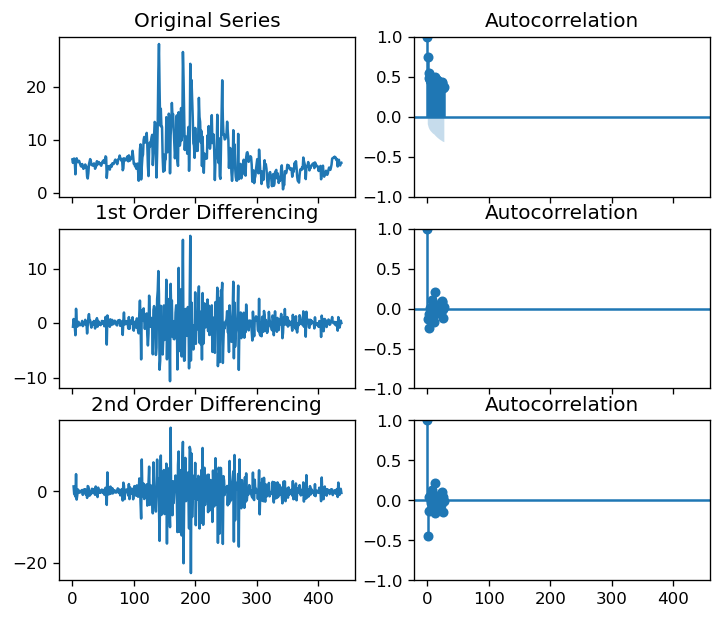

In [86]:
# Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Size of the time series plots
plt.rcParams.update({'figure.figsize':(7,6), 'figure.dpi':120})


# plotting original time series data
fig, axes = plt.subplots(3, 2, sharex=True)

# labeling the original data
axes[0, 0].plot(pm1['PM1(mcg/m³)']); axes[0, 0].set_title('Original Series')
plot_acf(pm1['PM1(mcg/m³)'], ax=axes[0, 1])

# first differenciating to make the data stationary
axes[1, 0].plot(pm1['PM1(mcg/m³)'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(pm1['PM1(mcg/m³)'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pm1['PM1(mcg/m³)'].diff().diff().dropna(), ax=axes[2, 1])
plt.show()
plt.show()

In [87]:
# Based on the above plot, we will take the value of p in arima model as 1 because after first differentiation 
# the data is nearly stationary

In [88]:
# Now we need to find the AR term

/home/student/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


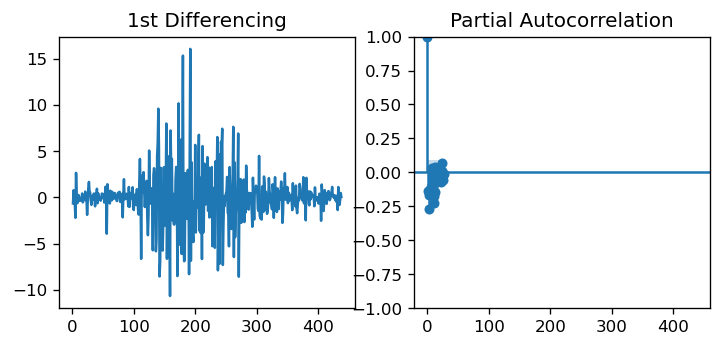

In [89]:
#importing the module
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# partial correlation of first term
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

# plotting on differen axis
axes[0].plot(pm1['PM1(mcg/m³)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

# plotting partial autocorrelation function
plot_pacf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1])
plt.show()

In [90]:
# We will take order of AR as 1 or 2 or 3 as three values are beyong the shaded area

In [92]:
# Now we need to find the order of MA term

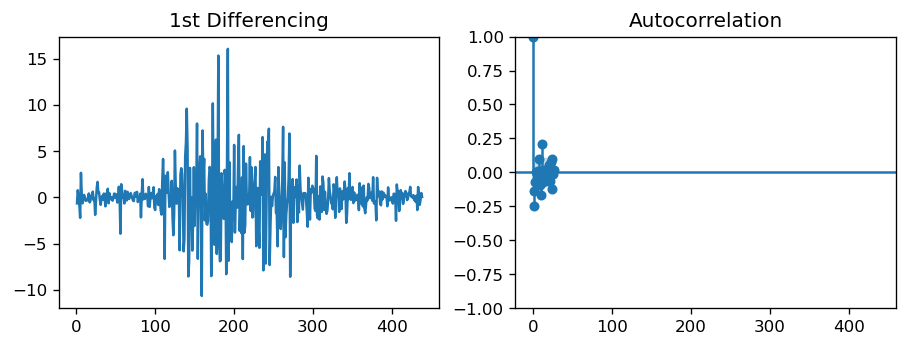

In [93]:
# setting the size
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#  fixing the subplots
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pm1['PM1(mcg/m³)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))

# plotting the autocorrelation function
plot_acf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1])
plt.show()

In [94]:
# again we will take q as 1 or 2 or 3

In [95]:
# so we will take p, d q = (1, 1, 1) or (1, 2, 2), or (1, 3, 3) 

<function matplotlib.pyplot.show(close=None, block=None)>

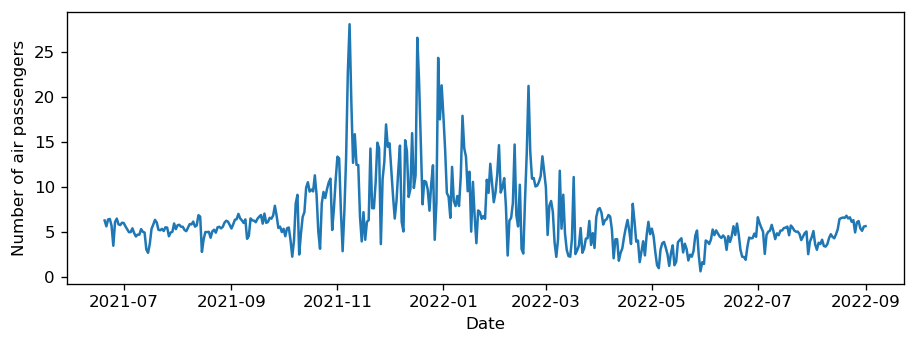

In [112]:
# labeling
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

# plotting
plt.plot(pm1)
plt.show

In [113]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(pm1)

In [118]:
#Determine rolling statistics
rolmean = pm1.rolling(window=12).mean() 
rolstd = pm1.rolling(window=12).std()

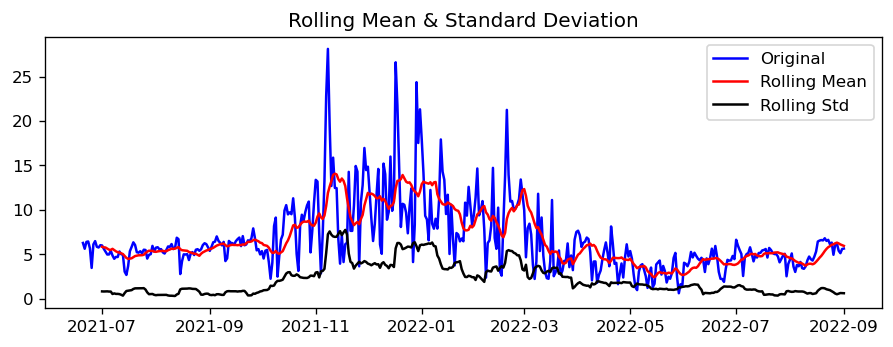

In [119]:
#Plot rolling statistics
orig = plt.plot(pm1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

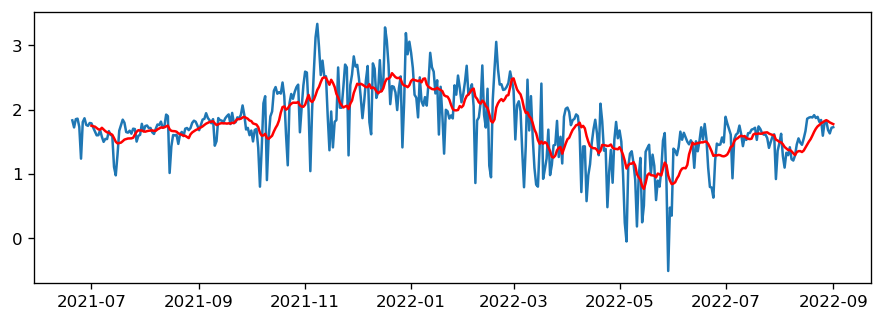

In [121]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(pm1)

#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [122]:
# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

,PM1(mcg/m³)
Day,
2021-07-01,0.037237
2021-07-02,-0.019132
2021-07-03,-0.072921
2021-07-04,-0.114461
2021-07-05,-0.090984


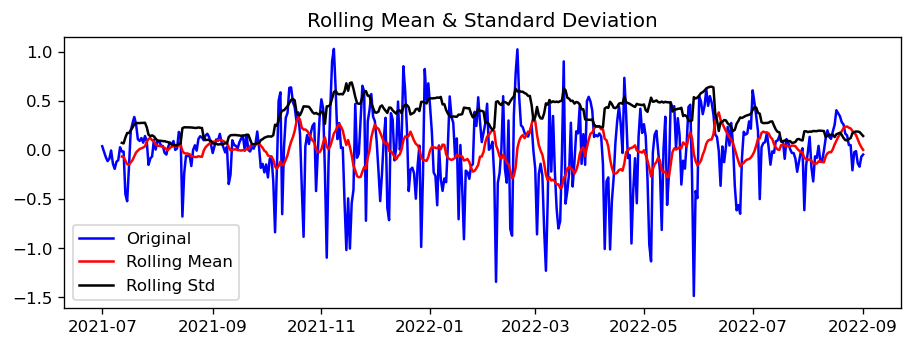

In [123]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [133]:
import statsmodels.api as sm

# 2, 1, 2 (arima p d q )
model = sm.tsa.arima.ARIMA(logScale, order=(1,1,1))

# 

# Training process 
model_fit = ARIMA_model.fit()

/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


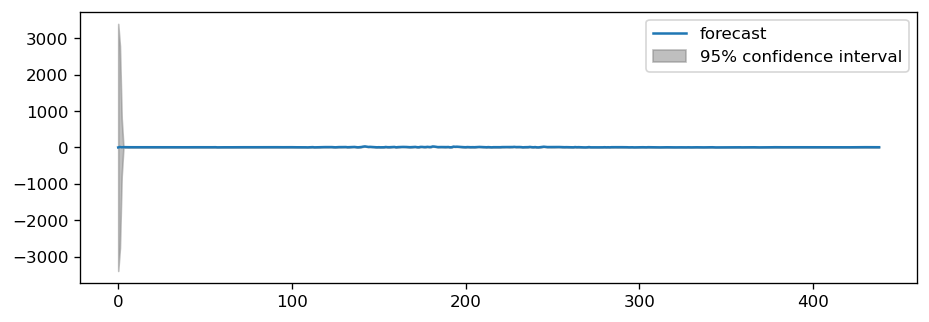

In [135]:
# arima model results
plot_predict(model_fit,dynamic=False)
plt.show()